In [11]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2 as cv
import matplotlib.pyplot as plt

In [12]:
def boundingbox(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

In [13]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [14]:
im = cv.imread(r"Tom-Cruise.webp")
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
im_copy = np.copy(im)
rects = detector(im_gray, 1)

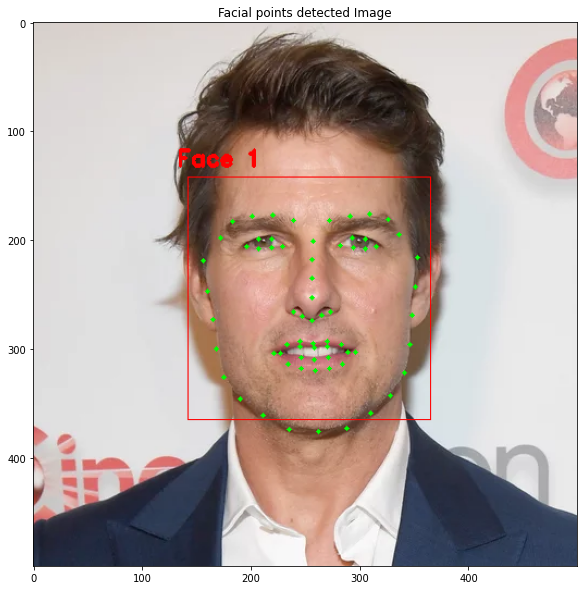

In [15]:
for (i, rect) in enumerate(rects):
    shape = predictor(im_gray, rect)
    shape = face_utils.shape_to_np(shape)

    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv.rectangle(im_copy, (x, y), (x + w, y + h), (0, 0, 255), 1)
    cv.putText(im_copy, "Face {}".format(i + 1), (x - 10, y - 10), cv.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)

    for (x, y) in shape:
            cv.circle(im_copy, (x, y), 2, (0, 255, 0), -1)

cv.imshow("Output", im_copy)
cv.waitKey(0)

fig, ax = plt.subplots(figsize=(10,10))
im_out = cv.cvtColor(im_copy,cv.COLOR_BGR2RGB)
ax.imshow(im_out)
ax.set_title("Facial points detected Image")
plt.show()
